
# Plant Disease Recognition - CNN Model

## Objectif
Classification de maladies des plantes en 3 catégories : Healthy, Powdery, Rust

## Dataset
Source : Kaggle - Plant Disease Recognition Dataset




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rashikrahmanpritom/plant-disease-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.25G/1.25G [00:32<00:00, 41.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1


## Configuration du versioning avec DVC

In [ ]:
# Initialiser DVC pour tracker le dataset
!pip install dvc dvc-gdrive -q

# Monter Google Drive pour stockage DVC
from google.colab import drive
drive.mount('/content/drive')

# Initialiser DVC
!dvc init -f

# Configurer le stockage distant sur Google Drive
!mkdir -p /content/drive/MyDrive/plant_disease_dvc_storage
!dvc remote add -d storage /content/drive/MyDrive/plant_disease_dvc_storage -f

print(" DVC configuré")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.7/469.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.5/445.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.

In [ ]:
import os

def total_files(folder_path):
    # Compte uniquement les fichiers
    return len([
        f for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f))
    ])

# Base path du dataset (COLAB)
base_path = path # Corrected path to use the downloaded dataset location

# Train
train_files_healthy = os.path.join(base_path, "Train", "Train", "Healthy")
train_files_powdery = os.path.join(base_path, "Train", "Train", "Powdery")
train_files_rust = os.path.join(base_path, "Train", "Train", "Rust")

# Test
test_files_healthy = os.path.join(base_path, "Test", "Test", "Healthy")
test_files_powdery = os.path.join(base_path, "Test", "Test", "Powdery")
test_files_rust = os.path.join(base_path, "Test", "Test", "Rust")

# Validation
valid_files_healthy = os.path.join(base_path, "Validation", "Validation", "Healthy")
valid_files_powdery = os.path.join(base_path, "Validation", "Validation", "Powdery")
valid_files_rust = os.path.join(base_path, "Validation", "Validation", "Rust")

# Affichage
print("=== TRAIN SET ===")
print("Healthy:", total_files(train_files_healthy))
print("Powdery:", total_files(train_files_powdery))
print("Rust:", total_files(train_files_rust))

print("=== TEST SET ===")
print("Healthy:", total_files(test_files_healthy))
print("Powdery:", total_files(test_files_powdery))
print("Rust:", total_files(test_files_rust))

print("=== VALIDATION SET ===")
print("Healthy:", total_files(valid_files_healthy))
print("Powdery:", total_files(valid_files_powdery))
print("Rust:", total_files(valid_files_rust))


=== TRAIN SET ===
Healthy: 458
Powdery: 430
Rust: 434
=== TEST SET ===
Healthy: 50
Powdery: 50
Rust: 50
=== VALIDATION SET ===
Healthy: 20
Powdery: 20
Rust: 20


## 2. Visualisation d'exemples


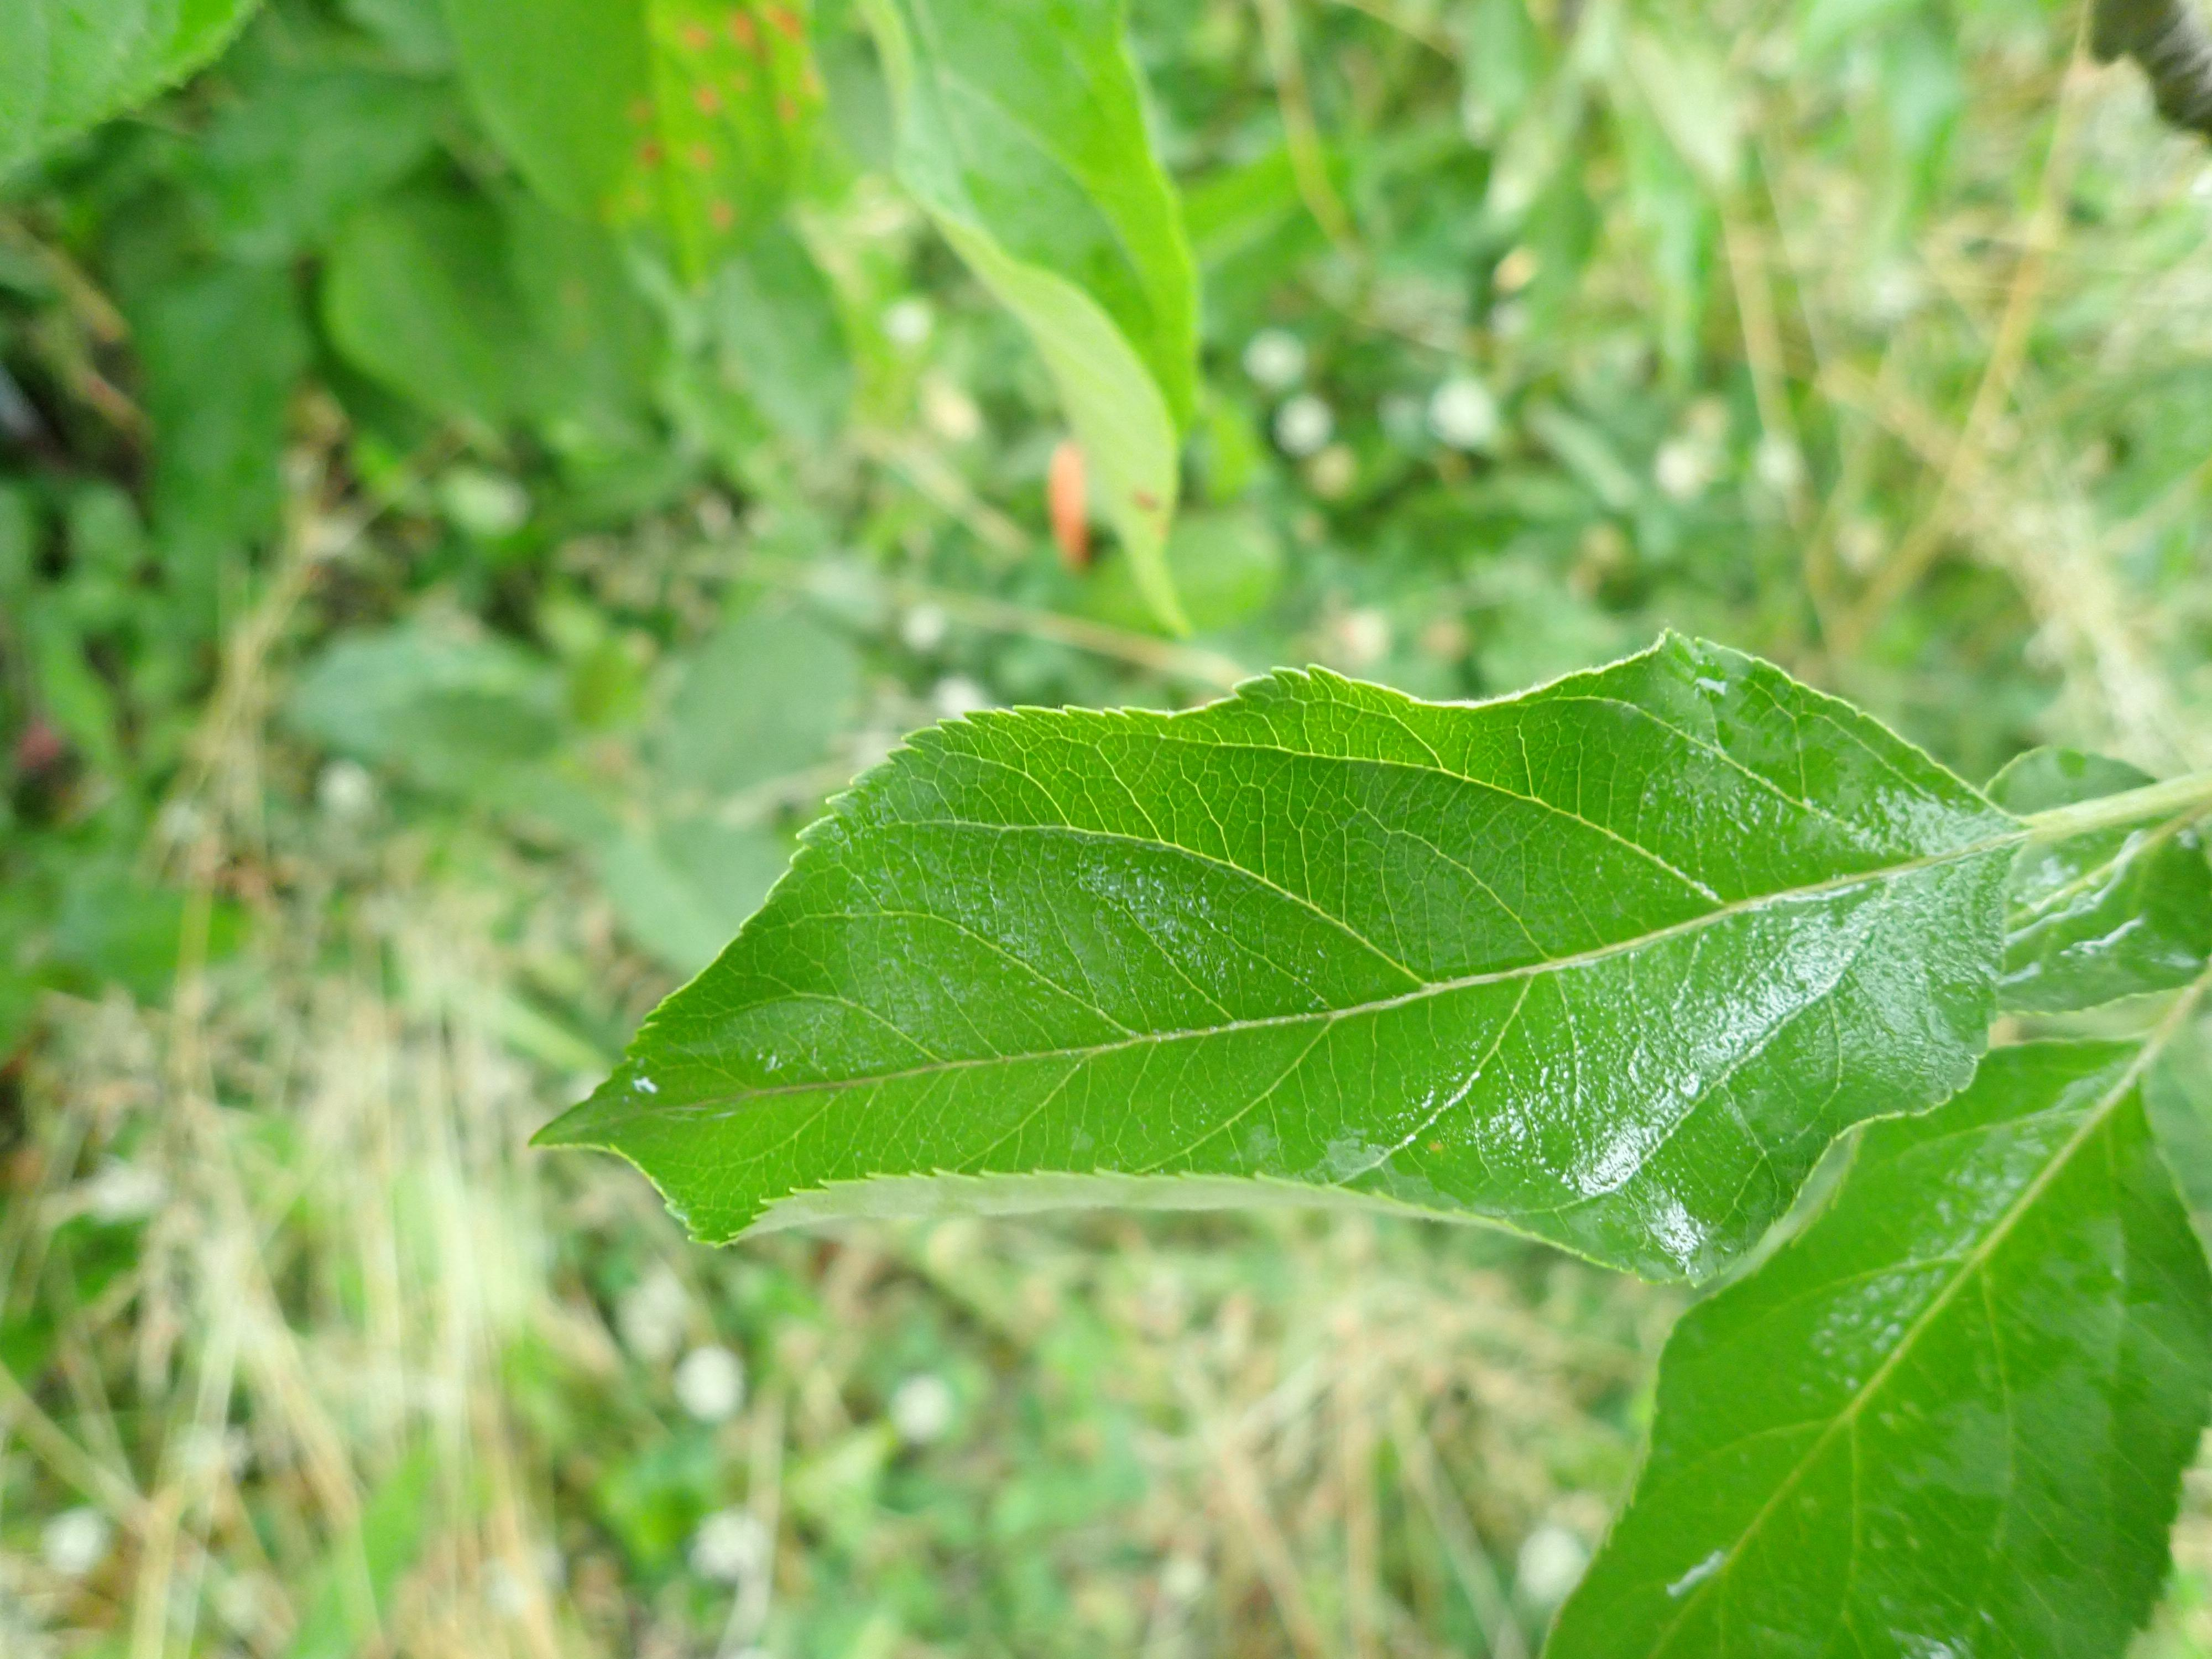

In [ ]:
from PIL import Image
import IPython.display as display
import os

# Chemin vers l'image (CORRIGÉ)
image_path = "/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Train/Train/Healthy/800edef467d27c15.jpg"

# Vérifier si le fichier existe
if os.path.exists(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))
else:
    print("Fichier introuvable :", image_path)


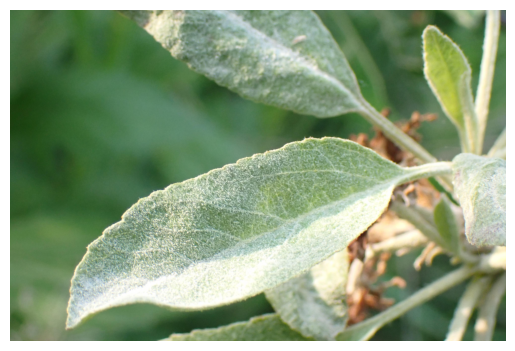

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_path = "/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Train/Train/Powdery/8a2d598f2ec436e6.jpg"

if os.path.isfile(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
else:
    print("Fichier introuvable :", image_path)


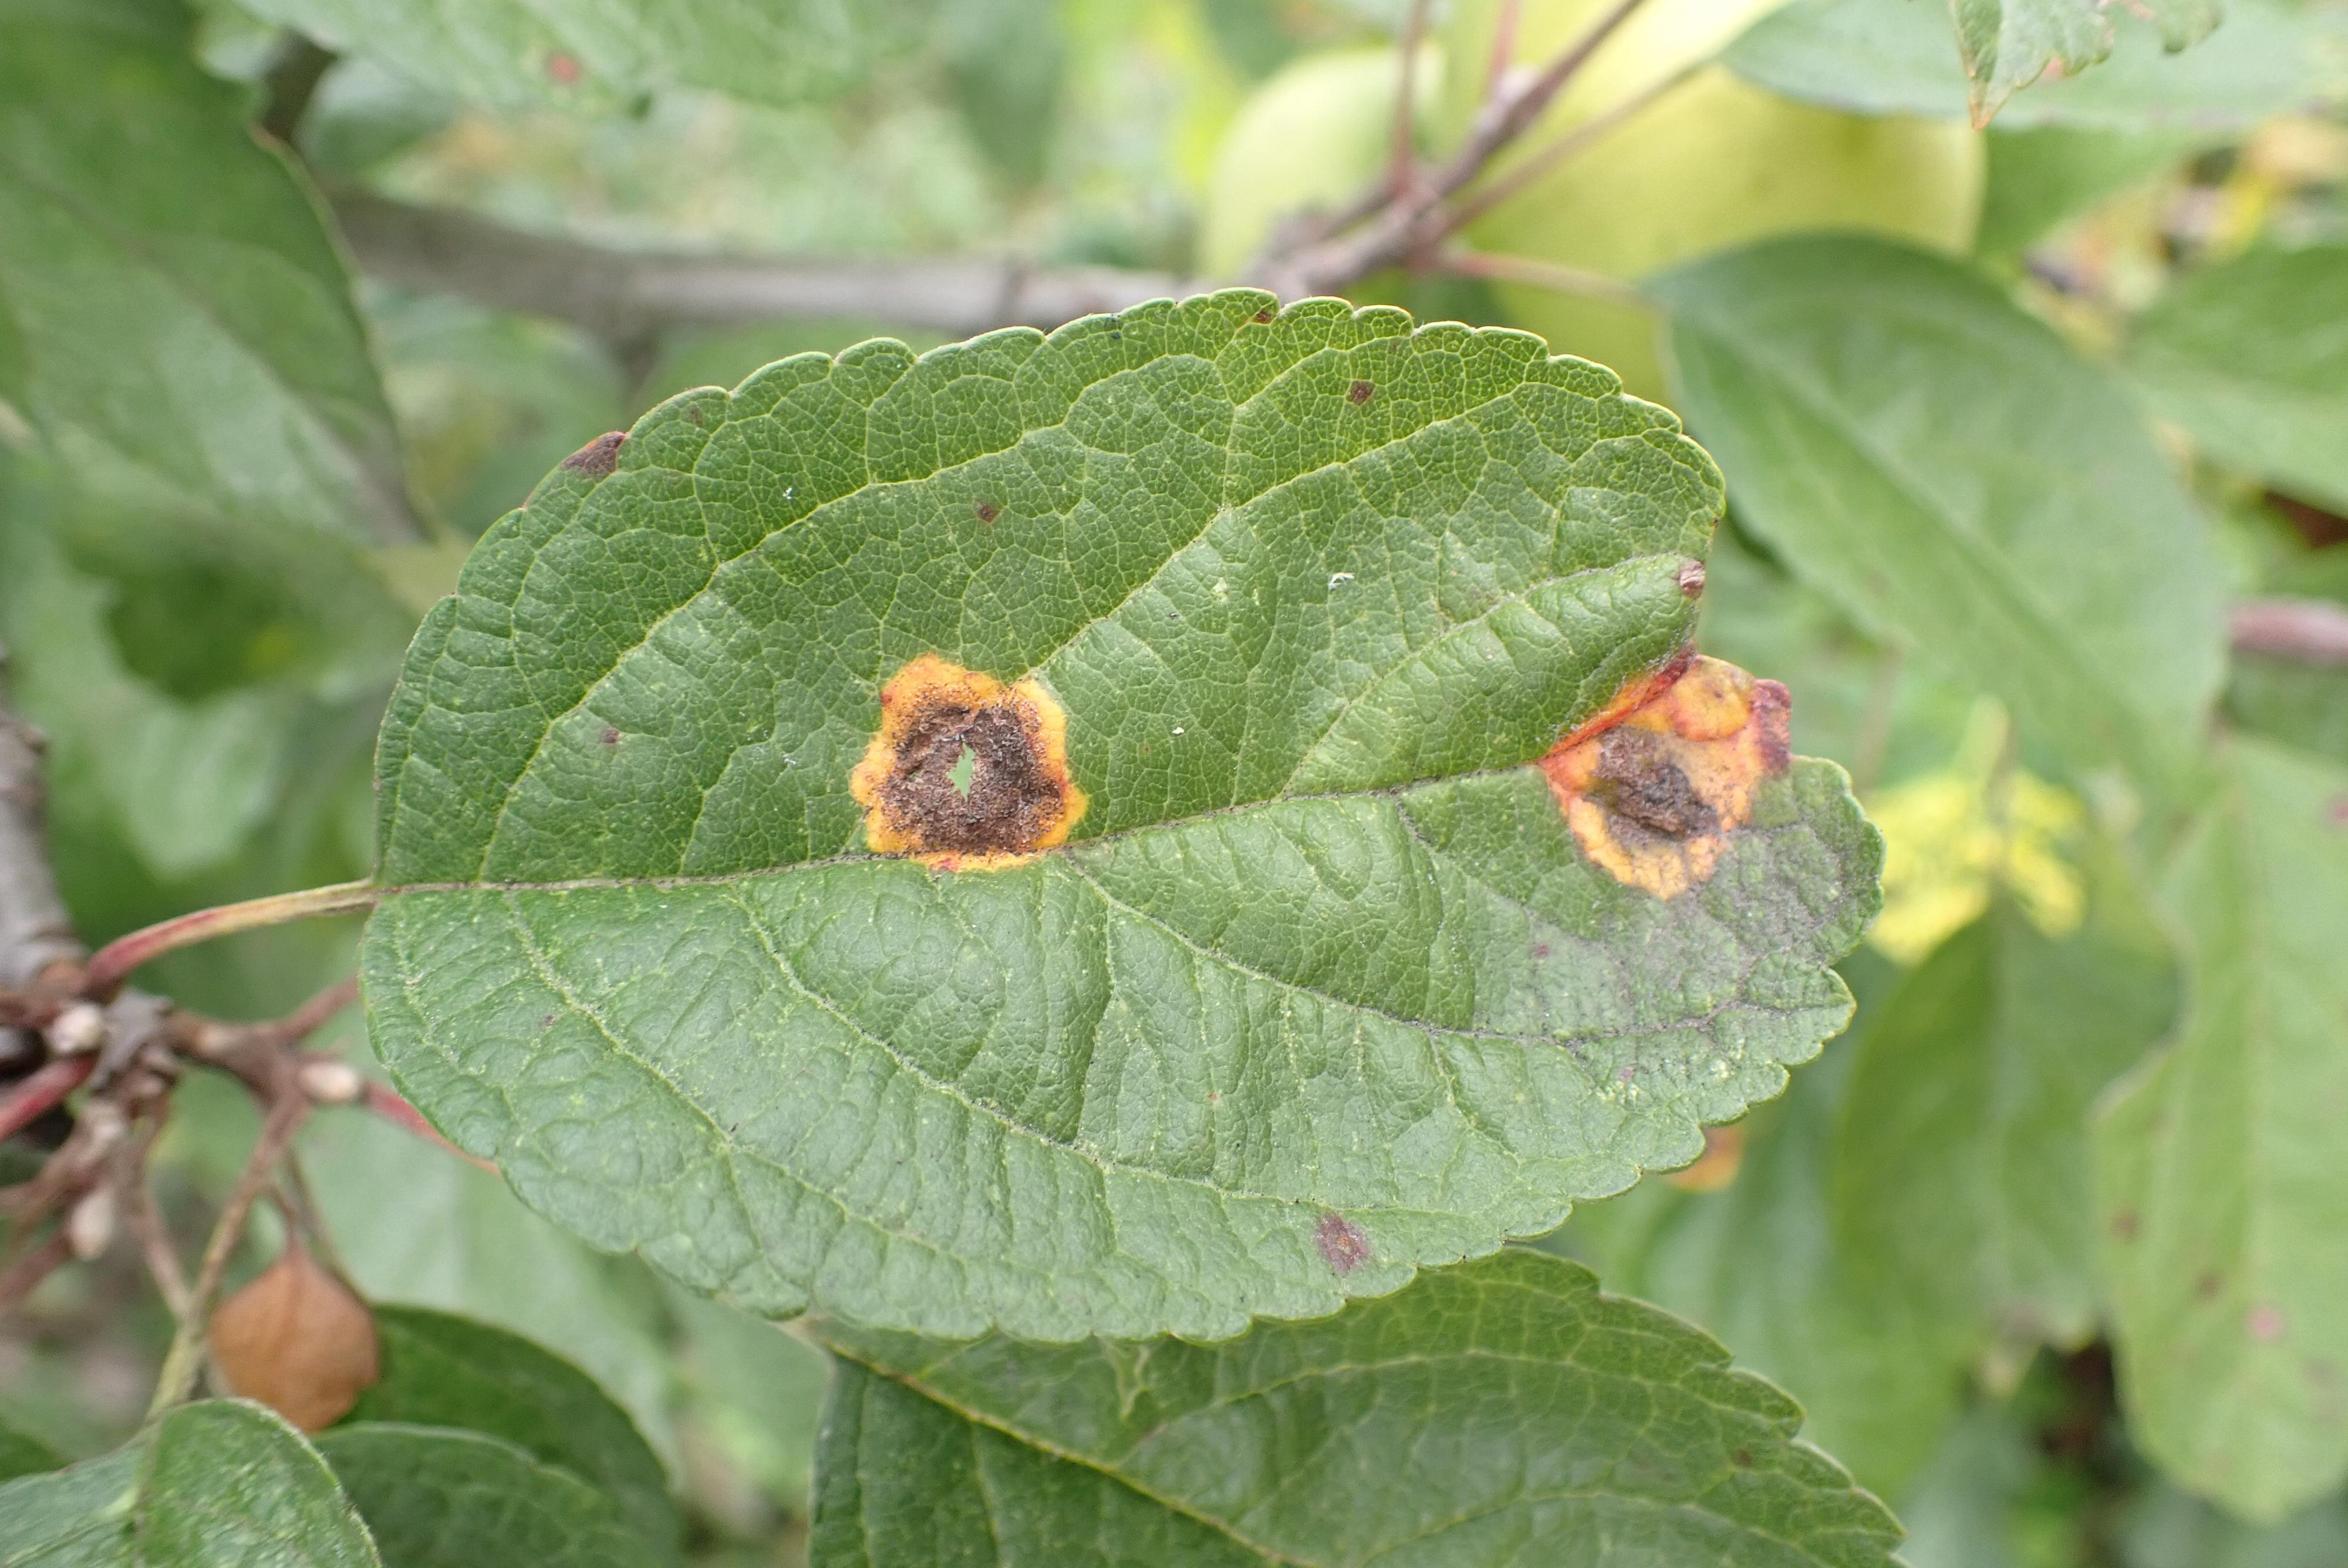

In [ ]:
from PIL import Image
import IPython.display as display
import os

# Chemin vers l'image (Colab / Linux)
image_path = "/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Train/Train/Rust/8a954b82bf81f2bc.jpg"

# Vérifier si le fichier existe
if os.path.isfile(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))
else:
    print("Fichier introuvable :", image_path)


## 3. Préparation des données
Data augmentation et création des générateurs

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Générateur pour les images d'entraînement avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisation
    shear_range=0.2,       # Cisaillement aléatoire
    zoom_range=0.2,        # Zoom aléatoire
    horizontal_flip=True   # Flip horizontal
)

# Générateur pour les images de test (ou validation)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Chemins du dataset (Colab / Linux)
train_dir = "/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Train/Train"
test_dir  = "/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Test/Test"

# Chargement des images d'entraînement
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

# Chargement des images de test
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # IMPORTANT pour matrice de confusion
)


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## 4. Construction du modèle CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# 1ère couche convolutionnelle
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2ème couche convolutionnelle
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Couches fully connected
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Couche de sortie (3 classes)
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Compilation du modèle

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Visualisation de l'architecture

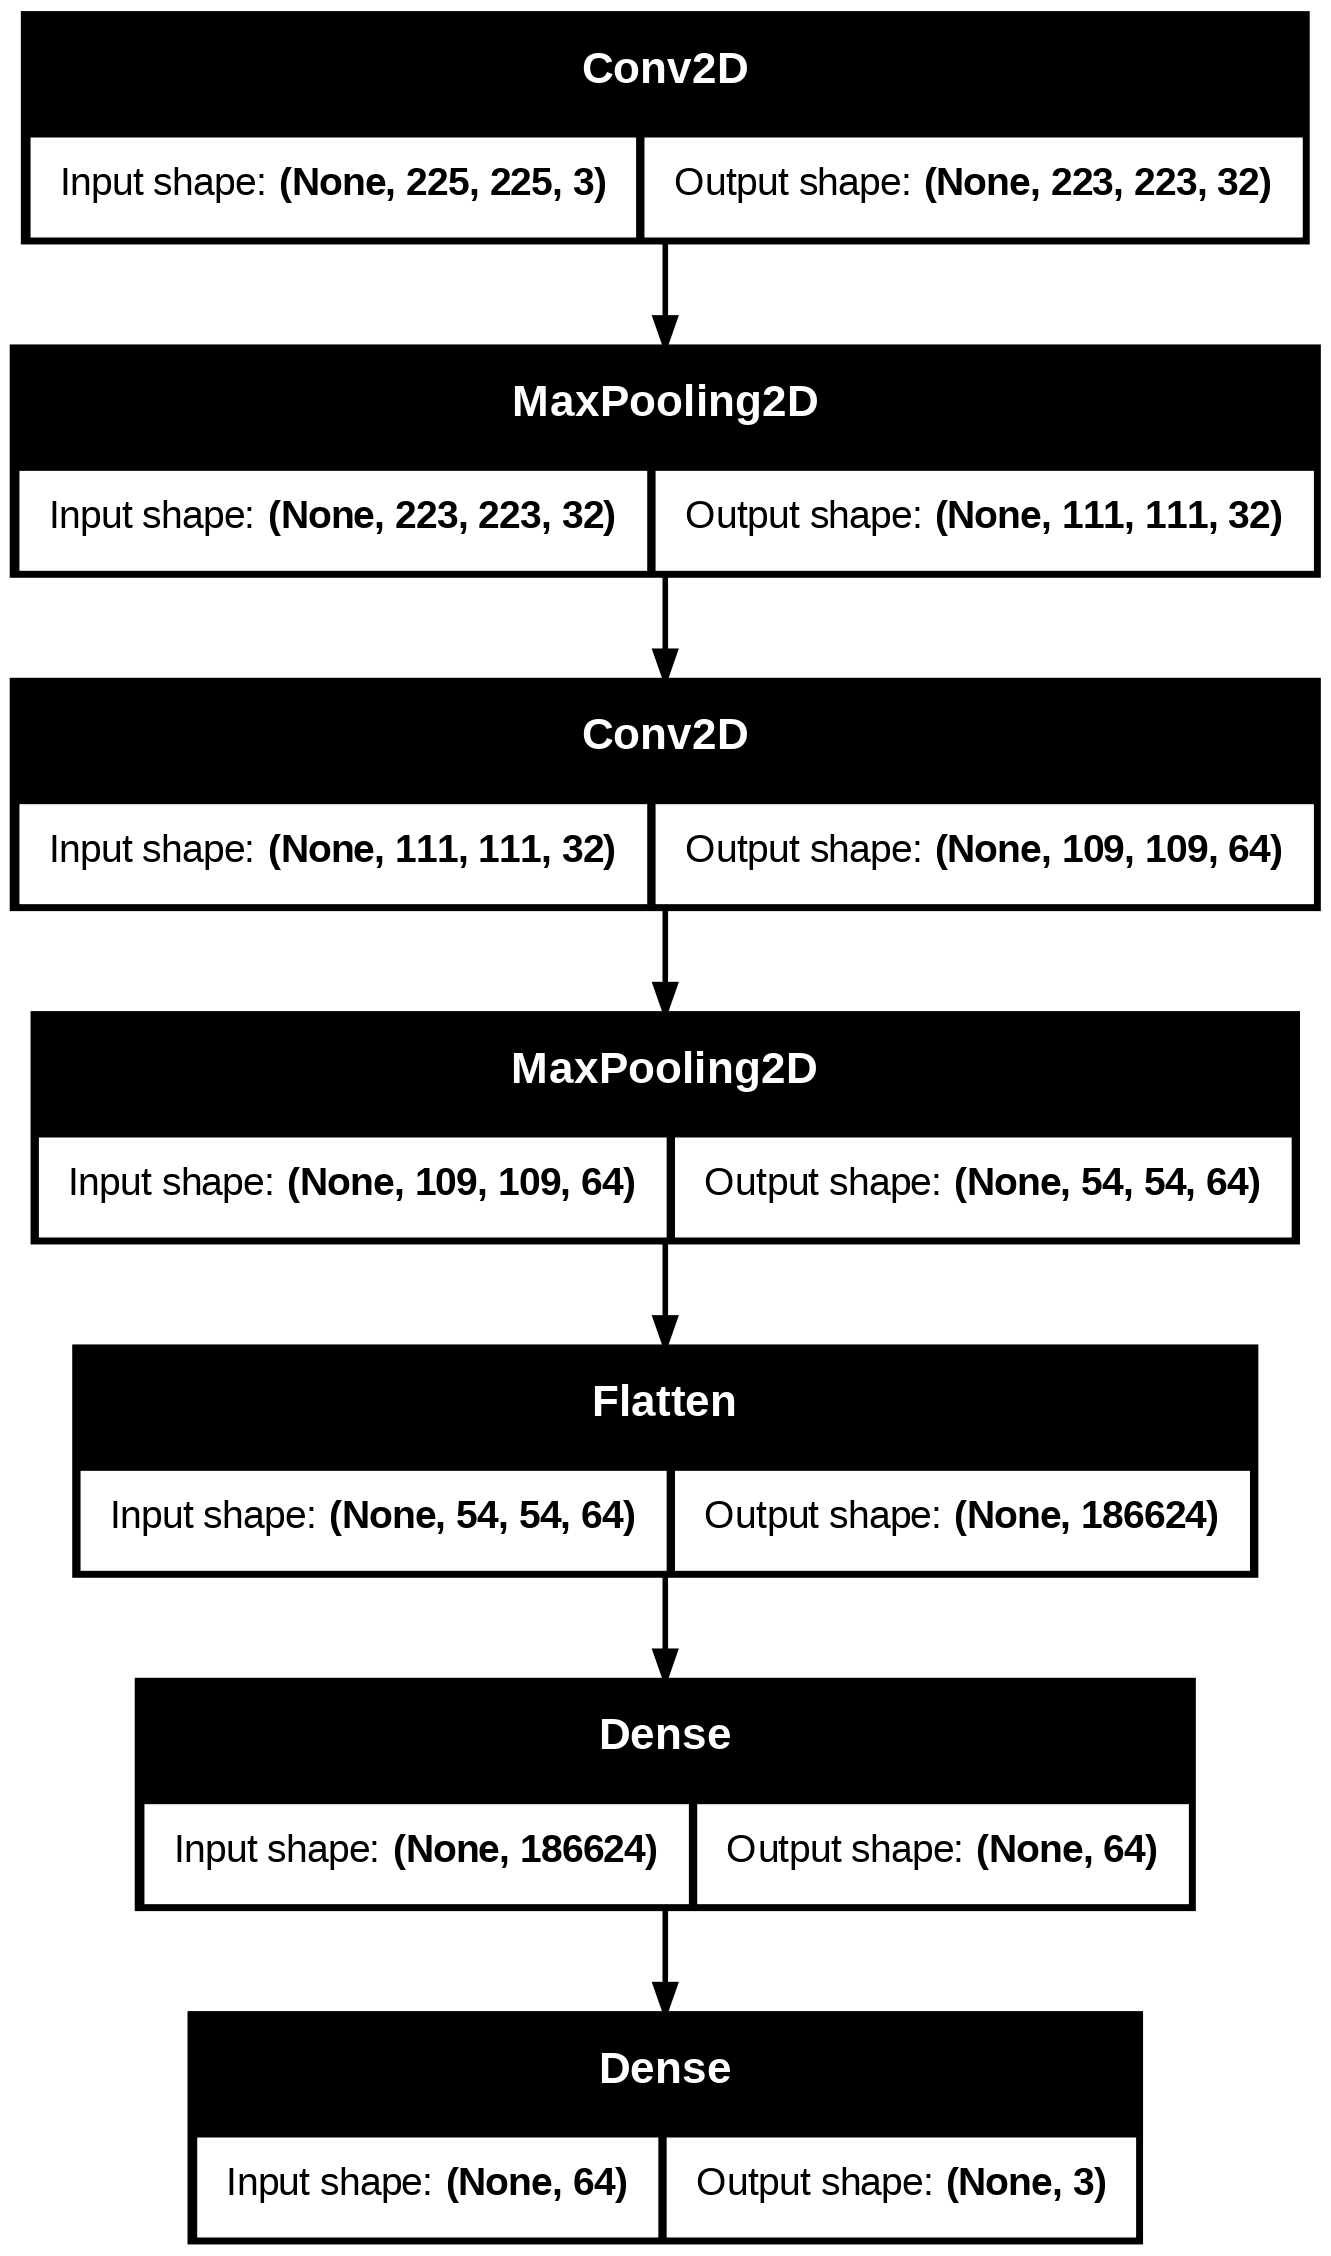

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

## 7. Entraînement du modèle

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_set,
    epochs=20,
    validation_data=test_set,
    callbacks=[early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.3844 - loss: 4.3491 - val_accuracy: 0.6067 - val_loss: 0.8345
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.6880 - loss: 0.6981 - val_accuracy: 0.6867 - val_loss: 0.6798
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7623 - loss: 0.5861 - val_accuracy: 0.7467 - val_loss: 0.6424
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8323 - loss: 0.4195 - val_accuracy: 0.8133 - val_loss: 0.4159
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8840 - loss: 0.3427 - val_accuracy: 0.8733 - val_loss: 0.3328
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9287 - loss: 0.2223 - val_accuracy: 0.8667 - val_loss: 0.3191
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9051 - loss: 0.2638 - val_accuracy: 0.8867 - val_loss: 0.3695
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9261 - loss: 0.2097 - val_accuracy: 0.8933 - val_los

## Sauvegarde et versioning du modèle

In [13]:
# Sauvegarder le modèle entraîné
model.save('plant_disease_model.h5')
print("✅ Modèle sauvegardé : plant_disease_model.h5")

# Sauvegarder l'historique d'entraînement
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
print("✅ Historique sauvegardé : training_history.pkl")

# Tracker avec DVC
!dvc add plant_disease_model.h5
!dvc add training_history.pkl

# Pousser vers le stockage distant (Google Drive)
!dvc push

print("✅ Modèle et historique trackés avec DVC")

✅ Modèle sauvegardé : plant_disease_model.h5
✅ Historique sauvegardé : training_history.pkl
ERROR: you are not inside of a DVC repository (checked up to mount point '/')
ERROR: you are not inside of a DVC repository (checked up to mount point '/')
ERROR: you are not inside of a DVC repository (checked up to mount point '/')
✅ Modèle et historique trackés avec DVC


## 8. Analyse des performances

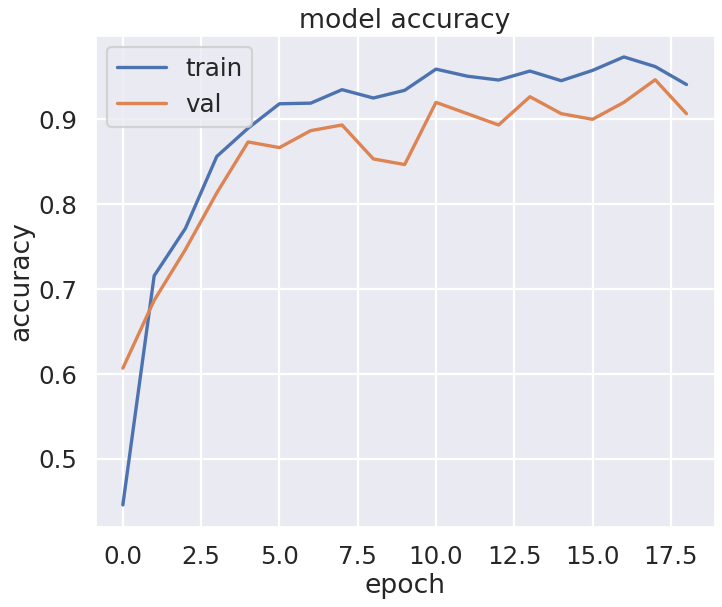

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(10, 8), dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

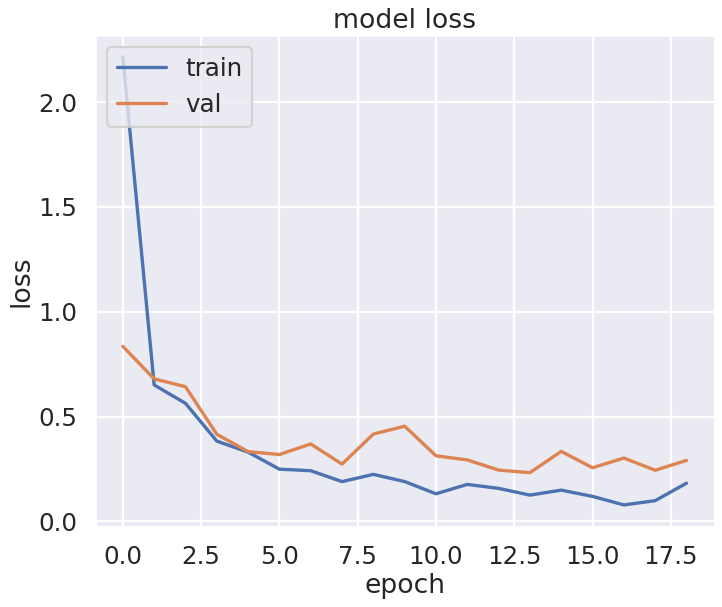

In [15]:
figure(figsize=(10, 8), dpi=80)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 9. Évaluation finale sur le test set

In [17]:
test_generator = test_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Test/Test',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

model.evaluate(test_generator)

Found 150 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9074 - loss: 0.2253


[0.23257344961166382, 0.9266666769981384]

## 10. Prédiction sur une image individuelle

In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    # load image
    img = load_img(image_path, target_size=target_size)

    # convert to array and preprocess
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)

    return x

x = preprocess_image('/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Test/Test/Rust/82f49a4a7b9585f1.jpg')


In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


array([6.7056261e-04, 1.8872356e-06, 9.9932748e-01], dtype=float32)

In [20]:
labels = train_set.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [22]:
predictions = model.predict(x)
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Rust


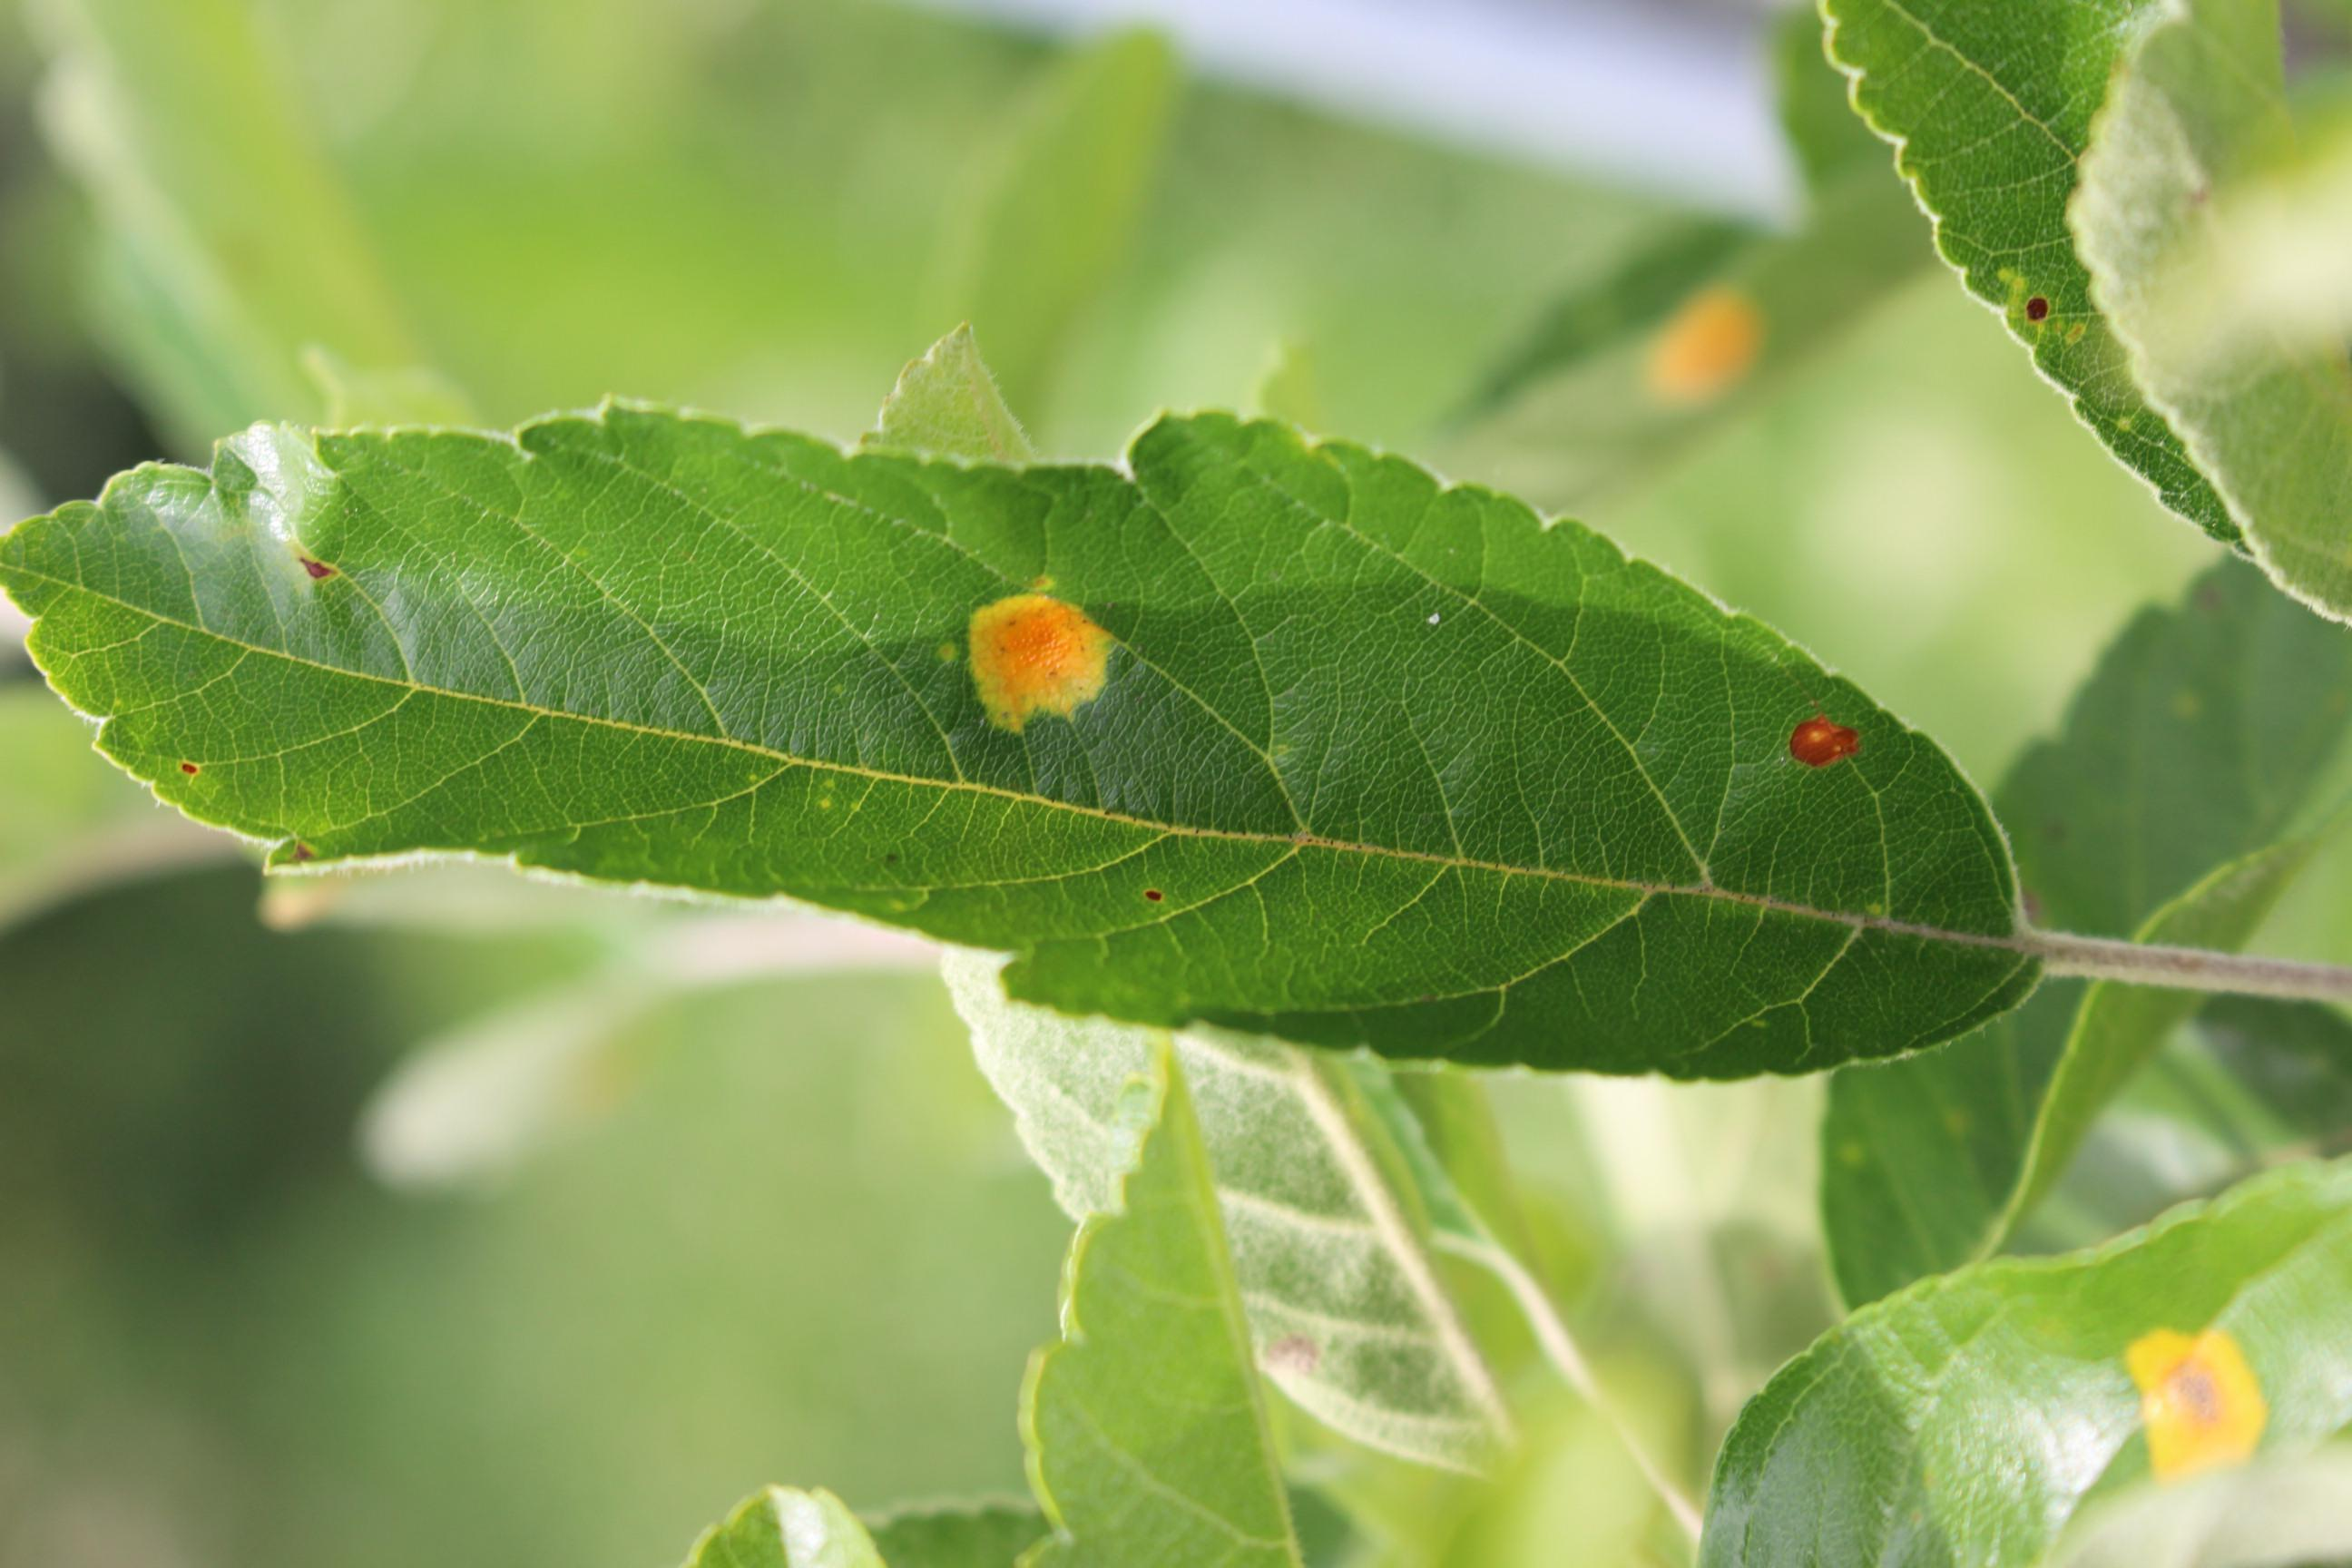

Prédiction : Rust
Confiance : 99.98%


In [24]:
# Afficher l'image avec la prédiction
img_path = '/root/.cache/kagglehub/datasets/rashikrahmanpritom/plant-disease-recognition-dataset/versions/1/Test/Test/Rust/82f49a4a7b9585f1.jpg'
if os.path.exists(img_path):
    with open(img_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=400))
    print(f"Prédiction : {predicted_label}")
    print(f"Confiance : {np.max(predictions[0]):.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


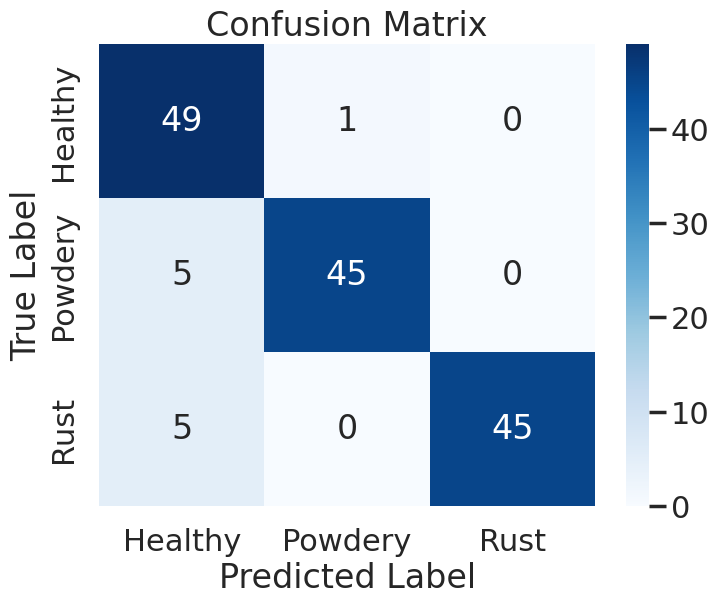

              precision    recall  f1-score   support

     Healthy       0.83      0.98      0.90        50
     Powdery       0.98      0.90      0.94        50
        Rust       1.00      0.90      0.95        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prédictions sur tout le test set
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels.values(),
            yticklabels=labels.values())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=labels.values()))